# Trees

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)
from scipy.stats import pointbiserialr, f_oneway
from scipy.stats import boxcox

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import Normalizer
import sklearn.ensemble

Background Info:
 - [Column Definitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - [Column Variables](https://www.kaggle.com/datasets/ahmedmohameddawoud/ames-housing-data)

Tasks:
 - <a href="#y">Y Variance (Histograms with Transformations)</a><br>
 - <a href="#f_var">Feature Variance (Histograms)</a><br>
 - <a href="#corr">Correlation Matrices</a><br>
 - <a href="#sp_corr">Feature / Salesprice Correlations</a><br>

In [173]:
housing_d = pd.read_csv('housing_cleaned.csv', index_col=0)

In [174]:
housing_d = housing_d.convert_dtypes()
housing_d = housing_d.reset_index().drop(columns = 'PID')
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2559 non-null   Int64  
 1   SalePrice      2559 non-null   Int64  
 2   MSSubClass     2559 non-null   Int64  
 3   MSZoning       2559 non-null   string 
 4   LotFrontage    2559 non-null   Int64  
 5   LotArea        2559 non-null   Int64  
 6   Street         2559 non-null   string 
 7   LotShape       2559 non-null   string 
 8   LandContour    2559 non-null   string 
 9   Utilities      2559 non-null   string 
 10  LotConfig      2559 non-null   string 
 11  LandSlope      2559 non-null   string 
 12  Neighborhood   2559 non-null   string 
 13  Condition1     2559 non-null   string 
 14  Condition2     2559 non-null   string 
 15  BldgType       2559 non-null   string 
 16  HouseStyle     2559 non-null   string 
 17  OverallQual    2559 non-null   Int64  
 18  OverallC

In [175]:
continuous = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','OverallQual','OverallCond',]
print(len(continuous))
continuous_no_sp = ['GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','OverallQual','OverallCond',]


continuous_wlog = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','SalesPrice_log','SalePrice_box','OverallQual','OverallCond',]
print(len(continuous_wlog))
categorical = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
              'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
              'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition']
print(len(categorical))
len(continuous_no_sp)

35
37
43


34

<p><a name="Y"></a></p>

#### Saturated Model, No Feature Engineering

In [309]:
from sklearn.preprocessing import LabelEncoder
housing_l = housing_d.copy()
for i in categorical:
    label_encoder_i = LabelEncoder()
    housing_l[i] = label_encoder_i.fit_transform(df[i])
housing_l.head(2)

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,lat,long
0,856,126000,1,4,0,7890,1,3,3,0,0,0,19,2,2,0,2,6,6,1939,1950,1,0,13,14,2,0,3,4,1,5,5,4,5,238,6,0,618,856,1,4,1,3,856,0,0,1,0,1,0,2,1,4,4,6,1,5,1939,3,2,399,5,5,2,0,0,0,0,166,0,3,4,1,0,2,2010,9,4,909176150,436 HAYWARD AVE,42.018564,-93.651619
1,1049,139500,11,4,42,4235,1,3,3,0,4,0,7,2,2,4,2,5,5,1984,1984,1,0,6,6,1,149,2,4,1,2,5,2,2,552,0,393,104,1049,1,4,1,3,1049,0,0,1,0,2,0,2,1,2,5,6,0,1,1984,0,1,266,5,5,2,0,105,0,0,0,0,3,4,1,0,1,2009,9,4,905476230,3416 WEST ST,42.024855,-93.663671


<Axes: title={'center': 'Trees Saturated Model v Log SalesPrice'}, xlabel='min_split'>

<Figure size 640x480 with 0 Axes>

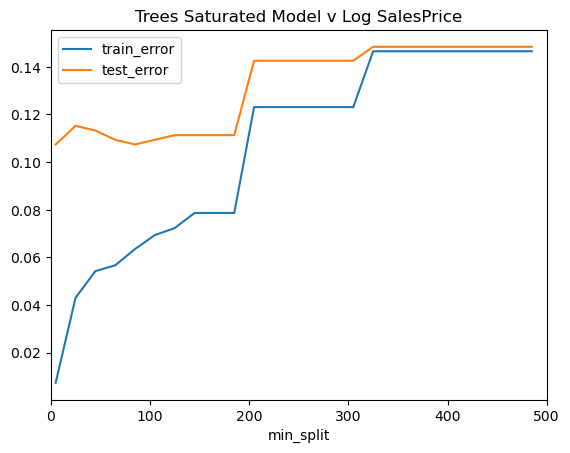

In [310]:
#Saturated Model
X = housing_l.drop(['SalePrice','MapRefNo','Prop_Addr','lat','long'], axis = 1)
y = np.log(housing_l['SalePrice']).round(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape
#Saturated Tree Model
errors = []
for i in range(5,500,20):
    tree_model = tree.DecisionTreeClassifier(min_samples_split=i)
    tree_model.fit(X_train, y_train)
    train_error = (1 - tree_model.score(X_train, y_train))
    test_error = (1 - tree_model.score(X_test, y_test))
    errors.append([i,train_error,test_error])
tree_scores = pd.DataFrame(errors, columns = ['min_split','train_error','test_error'])

plt.figure()
tree_scores.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = 'Trees Saturated Model v Log SalesPrice')
# plt.savefig('images/trees_sat.png')

In [311]:
tree_scores #best fit is 125

,min_split,train_error,test_error
0,5,0.007328,0.107422
1,25,0.042990,0.115234
2,45,0.054226,0.113281
3,65,0.056668,0.109375
4,85,0.063508,0.107422
5,105,0.069370,0.109375
6,125,0.072301,0.111328
7,145,0.078652,0.111328
8,165,0.078652,0.111328
9,185,0.078652,0.111328


In [312]:
#Saturated Model Features
tree_model = tree.DecisionTreeClassifier(min_samples_split=125)
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)
sat_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X_train.columns)
sat_tree_features[sat_tree_features[0]>0].sort_values(by=0, ascending = False)

,0
OverallQual,0.585271
GrLivArea,0.144941
BsmtFinSF1,0.110784
TotalBsmtSF,0.094061
GarageArea,0.021014
LotArea,0.020386
1stFlrSF,0.008618
KitchenQual,0.007988
OverallCond,0.003003
SaleCondition,0.002009


<Figure size 640x480 with 0 Axes>

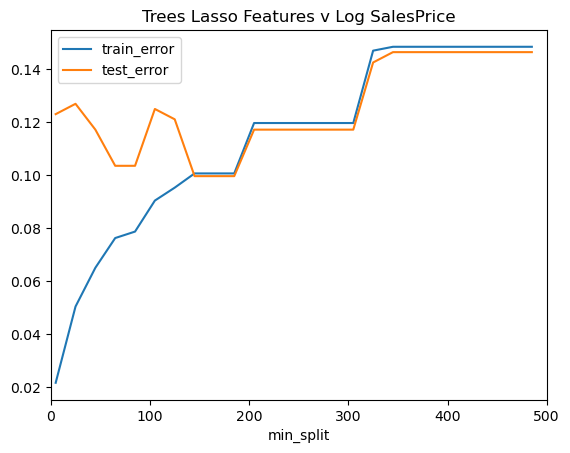

In [313]:
#Model using log and Lasso Features

errors1 = []
X1 = housing_d[['GrLivArea','OverallQual','YearBuilt','OverallCond','YearRemodAdd','BsmtFinSF2','BsmtUnfSF','Fireplaces','GarageYrBlt']]
y1 = np.log(housing_l['SalePrice']).round(0)
# Split the data into training and testing sets 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X1_train.shape
# X_test
# y_train
for i in range(5,500,20):
    tree_model = tree.DecisionTreeClassifier(min_samples_split=i)
    tree_model.fit(X1_train, y1_train)
    train_error = (1 - tree_model.score(X1_train, y1_train))
    test_error = (1 - tree_model.score(X1_test, y1_test))
    errors1.append([i,train_error,test_error])
tree_scores1 = pd.DataFrame(errors1, columns = ['min_split','train_error','test_error'])
# tree_scores1.plot.line()
plt.figure()
tree_scores1.plot.line(x = 'min_split', y = ['train_error','test_error',], xlim = (0,500), title = 'Trees Lasso Features v Log SalesPrice')
plt.savefig('images/trees_lass.png')

In [314]:
tree_scores1 #min split = 145

,min_split,train_error,test_error
0,5,0.021495,0.123047
1,25,0.050318,0.126953
2,45,0.064973,0.117188
3,65,0.076209,0.103516
4,85,0.078652,0.103516
5,105,0.090376,0.125000
6,125,0.095261,0.121094
7,145,0.100635,0.099609
8,165,0.100635,0.099609
9,185,0.100635,0.099609


In [315]:
#Model using log and Lasso Features
tree_model = tree.DecisionTreeClassifier(min_samples_split=145)
tree_model.fit(X1_train, y1_train)
tree_model.score(X1_test, y1_test)
las_tree_features = pd.DataFrame(tree_model.feature_importances_, index = X1_train.columns)
las_tree_features[las_tree_features[0]>0].sort_values(by=0, ascending = False)

,0
OverallQual,0.654548
GrLivArea,0.301277
OverallCond,0.011828
GarageYrBlt,0.010274
YearBuilt,0.007614
YearRemodAdd,0.006642
BsmtUnfSF,0.005802
Fireplaces,0.002015


In [316]:
#Grid Search the Lasso Features

from sklearn.model_selection import GridSearchCV
grid_para_tree = [  # 2 DICTIONARIES TO BE FASTER
    {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10)},
    {
    "criterion": ["gini", "entropy"],
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1)

%time grid_search_tree.fit(X1_train, y1_train)

/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 367 ms, sys: 118 ms, total: 485 ms
Wall time: 3.73 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_split=145,
                                              random_state=108),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': range(1, 10)},
                         {'criterion': ['gini', 'entropy'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='accuracy')

In [317]:
## best parameters
grid_search_tree.best_params_

{'criterion': 'entropy', 'min_samples_split': 26}

In [318]:
## best score
grid_search_tree.best_score_

0.901811676307472

In [319]:
grid_search_tree.score(X1_train, y1_train)

0.9496824621397166

In [320]:
grid_search_tree.score(X1_test, y1_test)

0.89453125

In [321]:
#Random Forest

from sklearn import ensemble
from sklearn.datasets import load_iris
randomForest = ensemble.RandomForestClassifier(oob_score = True)
bagging      = ensemble.BaggingClassifier()

randomForest.set_params(random_state=42, n_estimators=100, max_features=2)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [322]:
randomForest.fit(X1_train, y1_train) # fit 
randomForest.score(X1_test, y1_test) # accuracy

# randomForest.fit(X_train, y_train) # fit 
# randomForest.score(X_test, y_test) # accuracy

0.9140625

In [323]:
randomForest.oob_score_

0.9174401563263312

<Figure size 640x480 with 0 Axes>

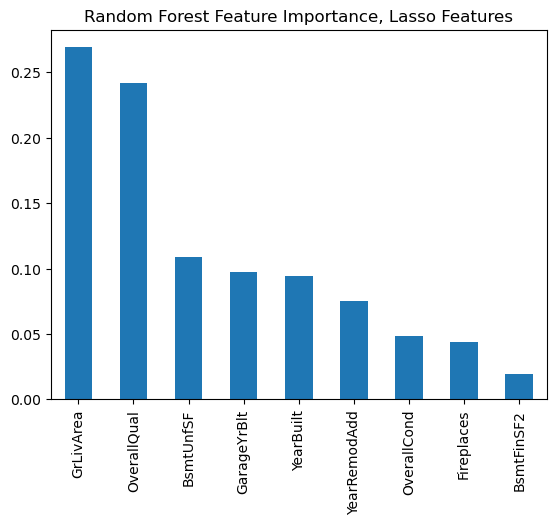

In [324]:
plt.figure()
pd.DataFrame(randomForest.feature_importances_, index = X1_train.columns).sort_values(
    by = 0, ascending = False).head(10).plot.bar(legend = False, title = 'Random Forest Feature Importance, Lasso Features')
plt.savefig('images/Forest_lass.png')

In [325]:
#ALT CODE FROM LECTURE
grid_para_forest = [{
        "n_estimators": [25, 50, 100],
        "criterion": ["gini", "entropy"],
        "min_samples_leaf": range(1, 10)
    },
    {                
        "n_estimators": [25, 50, 100],
        "criterion": ["gini", "entropy"],
        "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
        #"random_state": [42]
    }]

grid_search_forest = GridSearchCV(
    randomForest.set_params(random_state = 42), #move from grid to random forest
    grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X1_train, y1_train)

/Users/katherinekwan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 2.68 s, sys: 202 ms, total: 2.88 s
Wall time: 17.4 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=2, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': range(1, 10),
                          'n_estimators': [25, 50, 100]},
                         {'criterion': ['gini', 'entropy'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [25, 50, 100]}],
             scoring='accuracy')

In [326]:
grid_search_forest.best_params_

{'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 50}

In [327]:
grid_search_forest.best_score_

0.9218319518158508

#### Boosting

In [346]:
def tune_gbm(learning_rate, max_depth):
    gbm = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, min_samples_split = 10, max_depth=max_depth)
    gbm.fit(data[0],data[1])
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(data[0])
    gen_test  = model.staged_predict(data[2])

    trainMSE = []
    testMSE  = []
    steps   = range(1,101)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, data[1]))
        testMSE.append(mean_squared_error(y_pred_test, data[3]))
    y_pred = model.predict(data[2])
    r2 = r2_score(data[3], y_pred)
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print("The R squared is {:.2f}.".format(r2))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

In [347]:
#Saturated Model
data = [X_train, y_train, X_test, y_test]
learning_rate=0.001
max_depth=4

model1 = tune_gbm(learning_rate, max_depth)

The best test score is 0.18 at the step 100
The R squared is 0.10.
--------------------------------------------------


ValueError: x and y must have same first dimension, but have shapes (10000,) and (100,)

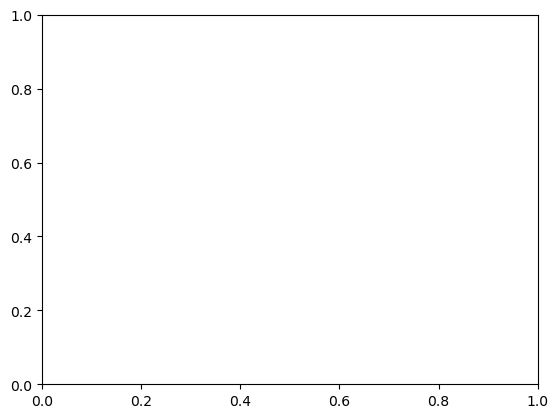

In [348]:
start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model1, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

In [306]:
sorted(zip(model1.feature_importances_, X_train.columns),key=lambda t:t[0], reverse=True)

[(0.4052291098705567, 'OverallQual'),
 (0.15481722902697256, 'GrLivArea'),
 (0.06671954652051508, 'TotalBsmtSF'),
 (0.06183967357739472, 'BsmtFinSF1'),
 (0.059007860258765026, 'GarageArea'),
 (0.028333174419045776, '1stFlrSF'),
 (0.020269086020041193, 'LotArea'),
 (0.016293253694705637, 'CentralAir'),
 (0.016226995086499402, 'OverallCond'),
 (0.01461321650769126, 'KitchenQual'),
 (0.01332791502169132, 'BsmtQual'),
 (0.012306266072476478, 'GarageYrBlt'),
 (0.010783917018415856, 'YearRemodAdd'),
 (0.010070945852080775, 'GarageCars'),
 (0.008043679789986744, 'YearBuilt'),
 (0.007478680196751332, 'BsmtUnfSF'),
 (0.006671116762718942, 'SaleCondition'),
 (0.005656496227457045, '2ndFlrSF'),
 (0.005216890935888784, 'MasVnrArea'),
 (0.00495014030062216, 'MoSold'),
 (0.004754209914708547, 'BsmtFinSF2'),
 (0.004544376297067684, 'WoodDeckSF'),
 (0.004534812012011644, 'TotRmsAbvGrd'),
 (0.0041466477876553175, 'ScreenPorch'),
 (0.003640754536087445, 'LotFrontage'),
 (0.0035217120007233135, 'BedroomA

The best test score is 0.06 at the step 9996
The R squared is 0.67.
--------------------------------------------------


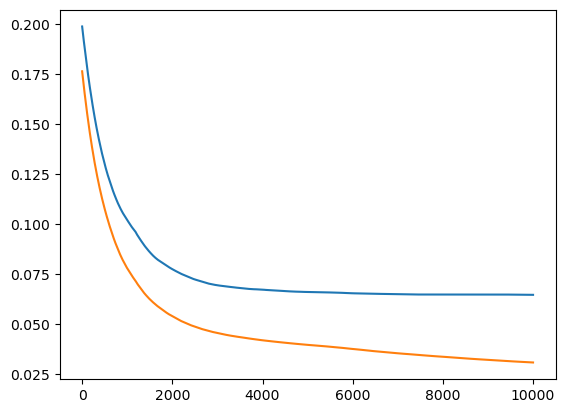

In [330]:
#Smler Model - not sure what it is
data = [X1_train, y1_train, X1_test, y1_test]
learning_rate=0.001
max_depth=4

model2 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model2, start, end)  #underfitting bc we have not seen the test increase. we have not hit a minimum

In [332]:
sorted(zip(model2.feature_importances_, X1_train.columns),key=lambda t:t[0], reverse=True)

[(0.5121837310973691, 'OverallQual'),
 (0.24431366637475907, 'GrLivArea'),
 (0.05403936590626461, 'GarageYrBlt'),
 (0.04322772007607215, 'BsmtUnfSF'),
 (0.03695707466797305, 'YearBuilt'),
 (0.03647979831578049, 'YearRemodAdd'),
 (0.033941409067038374, 'OverallCond'),
 (0.02574298526956826, 'Fireplaces'),
 (0.013114249225174882, 'BsmtFinSF2')]

In [333]:
X1_train

,GrLivArea,OverallQual,YearBuilt,OverallCond,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,Fireplaces,GarageYrBlt
975,1504,7,2005,5,2006,0,1330,1,2005
965,1113,6,1976,7,1976,0,392,1,1987
588,960,5,1955,5,1955,247,613,0,1955
242,2956,8,2004,5,2004,0,1706,1,2004
370,1027,7,1920,6,2006,0,931,1,0
...,...,...,...,...,...,...,...,...,...
960,1093,4,1958,6,2006,0,869,0,1959
905,988,6,1969,5,1969,0,0,2,1969
1096,1008,5,1952,6,2003,0,350,0,1952
235,1958,7,1994,5,2001,0,282,1,1994


Highest adjusted r squared for this line fo inquiry - MLS, selection by coefficients. 
['OverallCond',
 'OverallQual',
 'Fireplaces',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'LotFrontage']. All are continuous, which asks whether I have explored the categorical enough. 